In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Part 1: Data Loading and Basic Exploration
# Load the sample metadata
df = pd.read_csv("metadata.csv")

# Examine the first few rows and structure
print("First 5 rows:")
print(df.head())
print("\nDataFrame info:")
print(df.info())
print("\nDimensions (rows, columns):", df.shape)
print("\nData types:")
print(df.dtypes)

# Check for missing values in important columns
important_cols = ["title", "abstract", "publish_time", "authors", "journal", "source_x"]
print("\nMissing values:")
print(df[important_cols].isnull().sum())

# Basic statistics for numerical columns (none in this sample, but included for completeness)
print("\nBasic statistics:")
print(df.describe())

First 5 rows:
  cord_uid                             title  \
0   abc123  Study of SARS-CoV-2 Transmission   
1   def456           Antiviral Drug Efficacy   
2   ghi789          COVID-19 Immune Response   
3   jkl012      Vaccine Development Progress   
4   mno345          Epidemiology of COVID-19   

                                          abstract publish_time  \
0  Investigation of viral spread in urban settings   2020-05-12   
1        Analysis of drug effects on coronaviruses   2019-11-30   
2    Study of immune system activation in patients   2020-07-01   
3                  Overview of mRNA vaccine trials   2021-03-15   
4                  Case study of outbreak patterns   2020-09-10   

            authors     journal  source_x  
0     Smith J;Lee K    Virology       PMC  
1    Chen L;Patel R  J Med Chem  Elsevier  
2      Wong A;Kim S  Immunology       PMC  
3  Jones M;Garcia T     J Virol       PMC  
4  Brown P;Taylor E      Lancet  Elsevier  

DataFrame info:
<class 'panda

In [3]:
# Part 2: Data Cleaning and Preparation
# Handle missing data (sample has none, but included for robustness)
df_clean = df.dropna(subset=["title", "abstract"])

# Convert publish_time to datetime
df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")

# Extract year from publication date
df_clean["year"] = df_clean["publish_time"].dt.year

# Create abstract word count column
df_clean["abstract_word_count"] = df_clean["abstract"].apply(
    lambda x: len(str(x).split())
)

print("\nCleaned DataFrame shape:", df_clean.shape)
print("\nMissing values after cleaning:")
print(df_clean[important_cols].isnull().sum())


Cleaned DataFrame shape: (50, 9)

Missing values after cleaning:
title           0
abstract        0
publish_time    0
authors         0
journal         0
source_x        0
dtype: int64



Papers by year:
year
2019     2
2020    38
2021    10
Name: count, dtype: int64

Top 10 journals:
journal
Virology            1
J Med Chem          1
Immunology          1
J Virol             1
Lancet              1
Public Health       1
J Clin Virol        1
BMJ                 1
Epidemiology        1
J Clin Microbiol    1
Name: count, dtype: int64

Most frequent words in titles:
[('covid', 6), ('19', 5), ('transmission', 4), ('of', 3), ('efficacy', 3), ('immune', 3), ('vaccine', 3), ('effects', 3), ('testing', 3), ('viral', 3), ('sars', 2), ('cov', 2), ('2', 2), ('antiviral', 2), ('mask', 2), ('in', 2), ('outcomes', 2), ('spread', 2), ('antibody', 2), ('symptoms', 2)]


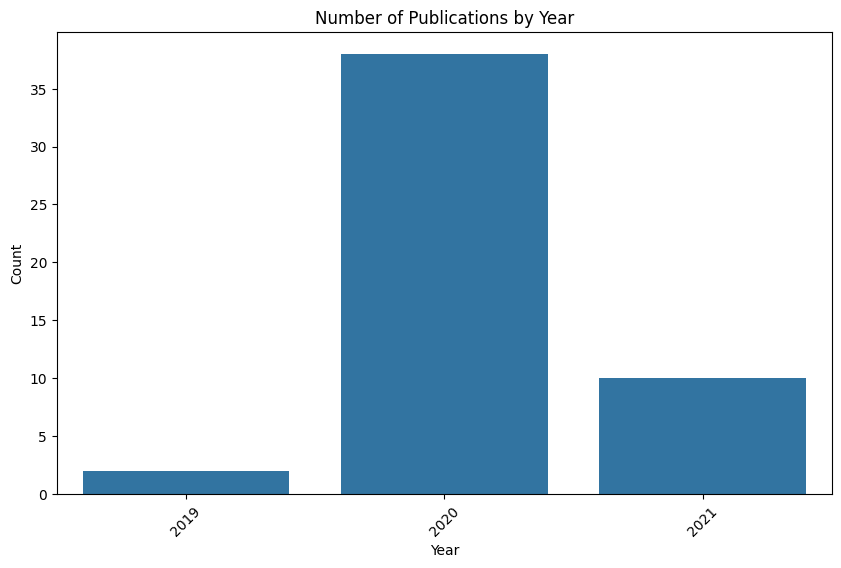

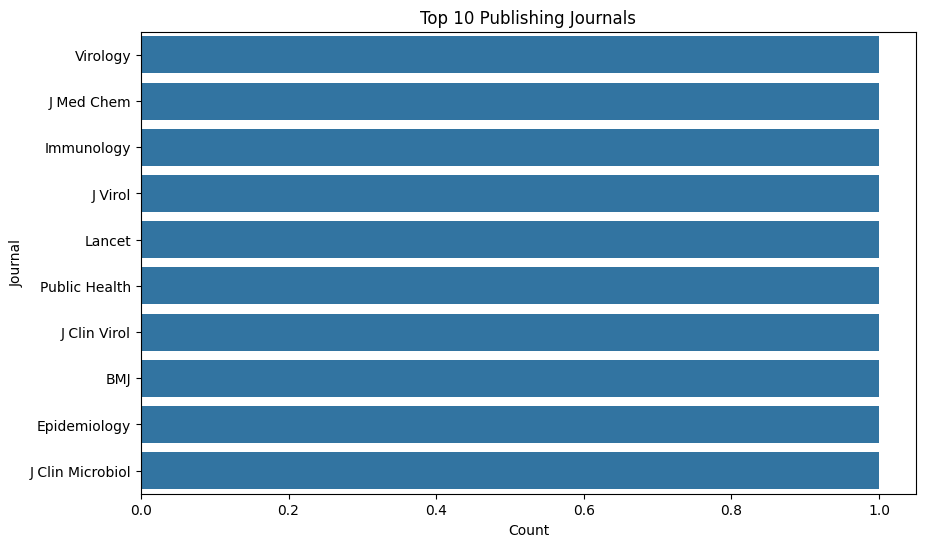

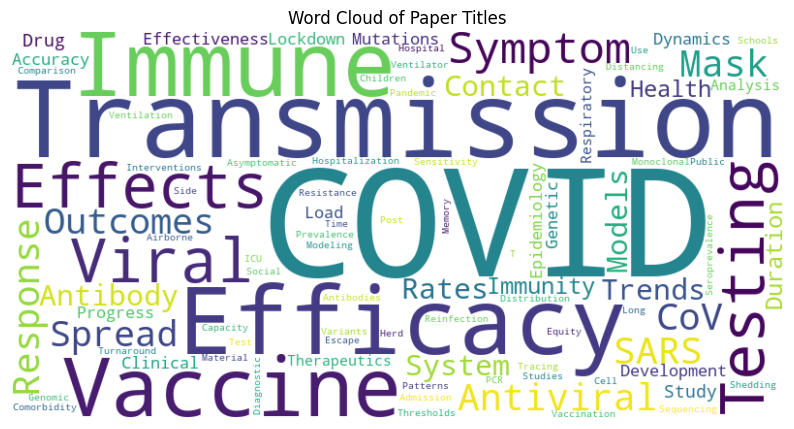

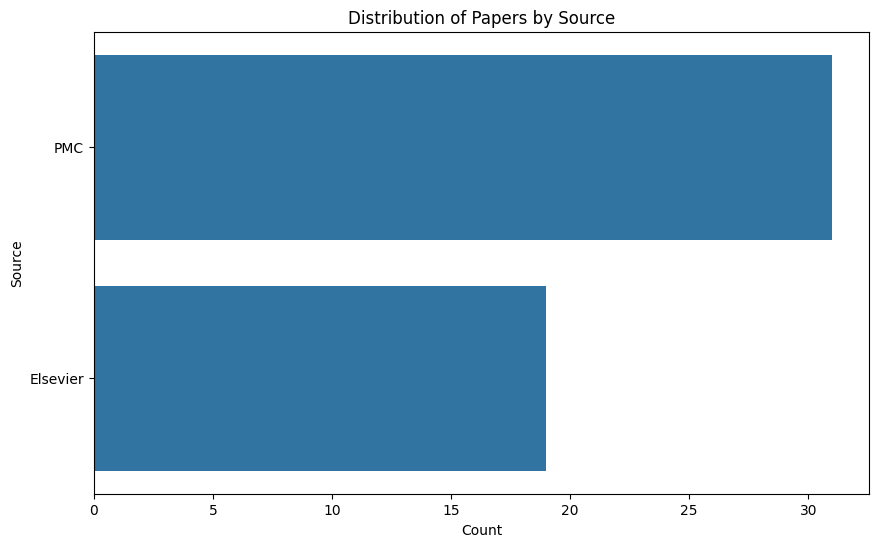

In [5]:
# Part 3: Data Analysis and Visualization
# Count papers by publication year
year_counts = df_clean["year"].value_counts().sort_index()
print("\nPapers by year:")
print(year_counts)

# Identify top journals
top_journals = df_clean["journal"].value_counts().head(10)
print("\nTop 10 journals:")
print(top_journals)

# Most frequent words in titles
def get_word_freq(text_series):
    all_text = " ".join(text_series.fillna("").str.lower())
    words = re.findall(r"\w+", all_text)
    return Counter(words)

title_word_freq = get_word_freq(df_clean["title"])
most_common_titles = title_word_freq.most_common(20)
print("\nMost frequent words in titles:")
print(most_common_titles)

# Plot number of publications over time
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Publications by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()  # Display the plot

# Bar chart of top publishing journals
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top 10 Publishing Journals")
plt.xlabel("Count")
plt.ylabel("Journal")
plt.show()  # Display the plot

# Generate word cloud of paper titles
all_titles = " ".join(df_clean["title"].fillna(""))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    all_titles
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()  # Display the plot

# Plot distribution of paper counts by source
source_counts = df_clean["source_x"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Distribution of Papers by Source")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()  # Display the plot